<a href="https://colab.research.google.com/github/Sompote/RIC_paper/blob/main/FFN_RIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Transformer Autoencoder to predict RIC combind model by Dr. Sompote Youwai 2023
import numpy as np
import pandas as pd

# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd



df = pd.read_excel('/content/drive/MyDrive/RIC/data_17aug.xlsx')
data=np.array(df)
X=data[:,1:29]
Y=data[:,34:62]
x_feature=data[:,29:32]




In [2]:
X_data_com=np.concatenate((X,x_feature),axis=1)
X_train=X_data_com
Y_train=Y
sc_y=StandardScaler()
sc = StandardScaler()
X_feature=x_feature
X_train=X

x_train = sc.fit_transform(X_train)
y_train=sc_y.fit_transform(Y_train)


In [3]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train, random_state=1,test_size=0.2)

In [5]:
#Model generation part
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, concatenate,Reshape, Dropout,Bidirectional
from keras.layers import MaxPooling1D
from keras.layers import LSTM, Dense
from tensorflow.keras.metrics import MeanAbsolutePercentageError

def FNN_dense(inputdim,outputdim):
  # Create the CNN model
  input = Input(shape=inputdim,name='dense_input')
  layer = Dense(100, activation='sigmoid')(input)
  layer = Dropout(0.2)(input)

  layer = Dense(50, activation='sigmoid')(layer)
  output= Dense(outputdim, activation='linear')(layer)


  model = Model(inputs=input, outputs=output,name='FNN_model')
  return model

FNN=FNN_dense(X_train.shape[1],Y_train.shape[1])

FNN.compile(optimizer='adam', loss='mse', metrics=['mae','mape'])
FNN.summary()
history=FNN.fit(X_train, Y_train, epochs=2000, batch_size=10,validation_data=(X_test, Y_test))



Model: "FNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 28)]              0         
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                1450      
                                                                 
 dense_3 (Dense)             (None, 28)                1428      
                                                                 
Total params: 2,878
Trainable params: 2,878
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
3/3 [==============================] - 3s 241ms/step - loss: 1.2662 - mae: 0.8851 - mape: 543.2784 - val_loss: 1.0867 - val_mae: 0.8413 - val_mape: 192.0610
Epoch 2/2000
3/3 

In [ ]:
def mape(y_true, y_pred):
  mape=np.mean(np.abs((Y - y_pred)/Y))*100
  # return mean of percentage errors
  return mape

def mae(y_true, y_pred):
  mae=np.mean(np.abs(Y - y_pred))
  # return mean of percentage errors
  return mae

y=FNN.predict(x_train)
y_pred=sc_y.inverse_transform(y)
mape=mape(Y,y_pred)
mae=mae(Y,y_pred)

print('MAPE=', mape)
print('MAPE=', mae)



1/1 [==============================] - 0s 65ms/step
MAPE= 12.312235107887211
MAPE= 0.43749377093536934


Model: "FNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 28)]              0         
                                                                 
 dense_18 (Dense)            (None, 100)               2900      
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 28)                1428      
                                                                 
Total params: 9,378
Trainable params: 9,378
Non-trainable params: 0
_________________________________________________________________


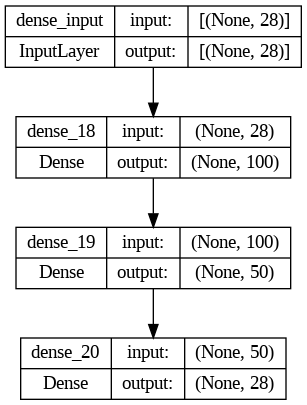

In [ ]:
# plot and save your model
import tensorflow as tf
model_transform=FNN
model_transform.summary()
img_file = 'model_transform.png'
tf.keras.utils.plot_model(model_transform, to_file=img_file, show_shapes=True, show_layer_names=True)
